# Mathematics of Machine Learning

## Programming tasks: The creditworthiness assessment

Import required modules

In [6]:
import numpy as np
import matplotlib.pyplot as plt

Define hypothesis function `hypo_func`, which returns for argument $x$ and chosen treshold parameter $a$ the value `True` if $x \geq a$ and `False` for $x < a$

In [7]:
# define hypothesis function
hypo_func = lambda x, a: x >= a
# Define treshold values a for the 10 different hypotheses h_1,...,h_10
a_step = 200
a_values = np.arange(start=4400, stop=6200+a_step, step=a_step)
a_values

array([4400, 4600, 4800, 5000, 5200, 5400, 5600, 5800, 6000, 6200])

In [8]:
# Define true hypothesis with treshold a = 5400
h_true = lambda x: x >= 5400

### Simulation of Machine Learning

In [26]:
# Number of repetitions
M = 10000

n = 10 # cardinality of hypothesis class

# bound on estimation error and failure probability
eps = ... # TO BE FILLED IN BY YOU
delta = ... # TO BE FILLED IN BY YOU

# Number of data per training data set
m = ... # TO BE FILLED IN BY YOU


In [27]:
# init random number generator
rng = np.random.default_rng(seed=17)

# pre-allocate lists
RS_min = np.zeros(M) # values of empirical risks
h_S = np.zeros(M, dtype='int') # values of chosen hypothesis
for j in range(M):  # 0..M-1
    incomes = 3000 + 4000*rng.uniform(size=m)
    credit_payback = h_true(incomes)
    RS_h = []  # empty list
    # Evaluation of the empirical risks
    for a in a_values:
        # The symbol != compares the two vectors element by element:
        # - sets 0 if two elements at the same position in the vector are identical, 
        # - otherwise 1 at the respective position.
        RS = np.mean(hypo_func(incomes, a) != credit_payback)
        RS_h.append( RS )

    # Determine the minimizer of the empirical risk and save it in the corresponding vectors.
    RS_min[j], h_S[j] = np.min(RS_h), np.argmin(RS_h) + 1 # argmin returns hypthesis index 0..len(hypo_values)-1

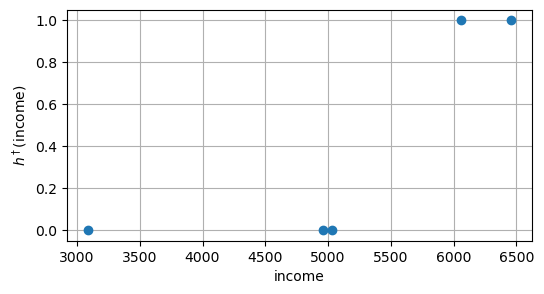

In [28]:
# Scatter plot of credit_default and earnings from last iteration of the previous for-loop
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(incomes, credit_payback, zorder = 2)
ax.grid()
ax.set_xlabel('income')
ax.set_ylabel('$h^\dagger$(income)')
plt.show()

Graphical output of the learned hypotheses

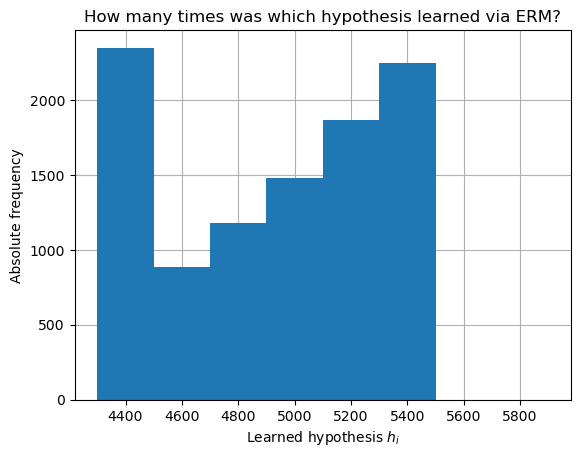

In [29]:
fig2, ax2 = plt.subplots()
ax2.hist(a_values[h_S-1], bins=np.arange(4300, 6100, a_step), density = False, zorder=2)
ax2.grid()
#ax2.set_ylim(top=1)
ax2.set_title("How many times was which hypothesis learned via ERM?")
ax2.set_xlabel("Learned hypothesis $h_i$")
ax2.set_ylabel("Absolute frequency")
plt.show()

Examine how many times the hypothesis $i$ was learned....

In [30]:
# Examine how many times the hypothesis 'i' was learned....
a = 5000
print(np.mean(a_values[h_S-1] < 5200 ))

0.589
